In [112]:
import pandas as pd
import numpy as np
import string
import re
import nltk

## Load data

In [113]:
data  = pd.read_csv("data/spam_mail.csv")
data.head()

,Subject,Content,evaluation
0,Subject: buy prescripiton pills,boulder rendition wingback equivocate albrecht...,1
1,Subject: re : swift - october 2000 vols,done\ndaren j farmer\n10 / 16 / 2000 03 : 46 p...,0
2,Subject: eastrans nomination change effective ...,"deliveries to eastrans continue to be 30 , 000...",0
3,Subject: weekend oncall notes,friday 1 / 19 / 01 - received a call from shei...,0
4,Subject: re : hello,"hello vince ,\nhow are you this week ?\nmy wee...",0


## Cleaning

removing rows which have nan value

In [114]:
data.isna().sum()

Subject       0
Content       1
evaluation    0
dtype: int64

In [115]:
data.dropna(subset='Content',inplace=True)
data.reset_index(inplace=True,drop=True)

## Removing Punctuations

In order to handle data, we need to remove punctuations that dont have many value to classification.

In [116]:
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

data["body_text_clean"] = data["Content"].apply(lambda x: remove_punc(x))
data["Subject"] = data["Subject"].apply(lambda x: remove_punc(x))

In [117]:
sample_text = "Our art team creates a custom logo for you , based on your needs . years of experience have taught us how to create a logo that makes a statement that is unique to you in a profess ional manner we learn about your image and how you would like the world to perceive you and your company . with this information we then create a logo that is not only unique but reflects the purpose of you and your company for value and a logo that reflects your image , take a few minutes and visit try logos !http : / / wwwl . try - logos . biz /sincerely ,logo design teamhttp : / / wwwl . try - logos . biz / uns . php"
res = remove_punc(sample_text)
res

'Our art team creates a custom logo for you  based on your needs  years of experience have taught us how to create a logo that makes a statement that is unique to you in a profess ional manner we learn about your image and how you would like the world to perceive you and your company  with this information we then create a logo that is not only unique but reflects the purpose of you and your company for value and a logo that reflects your image  take a few minutes and visit try logos http    wwwl  try  logos  biz sincerely logo design teamhttp    wwwl  try  logos  biz  uns  php'

## Tokenize

Slipping document into words.

In [118]:
def tokenize(text):
    tokens = re.split("\W+", text)
    tokens = [x.lower() for x in tokens]
    return tokens

data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: tokenize(x))
data["subject_tokenized"] = data["Subject"].apply(lambda x: tokenize(x))

In [119]:
res = tokenize(res)
set(res)

{'a',
 'about',
 'and',
 'art',
 'based',
 'biz',
 'but',
 'company',
 'create',
 'creates',
 'custom',
 'design',
 'experience',
 'few',
 'for',
 'have',
 'how',
 'http',
 'image',
 'in',
 'information',
 'ional',
 'is',
 'learn',
 'like',
 'logo',
 'logos',
 'makes',
 'manner',
 'minutes',
 'needs',
 'not',
 'of',
 'on',
 'only',
 'our',
 'perceive',
 'php',
 'profess',
 'purpose',
 'reflects',
 'sincerely',
 'statement',
 'take',
 'taught',
 'team',
 'teamhttp',
 'that',
 'the',
 'then',
 'this',
 'to',
 'try',
 'unique',
 'uns',
 'us',
 'value',
 'visit',
 'we',
 'with',
 'world',
 'would',
 'wwwl',
 'years',
 'you',
 'your'}

In [120]:
#use nltk.tokenize package
data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: nltk.tokenize.word_tokenize(x))

## Remove Stopwords

Stopword are the word that dont have contribution to major meaning of sentences.
Examples of stopwords in English include "the," "and," "is," "in," "to," "of," etc

In [121]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords.append('\n')
def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]
    return text

data["body_text_nonstop"] = data["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
data["subject_nonstop"] = data["subject_tokenized"].apply(lambda x: remove_stopwords(x))

In [122]:
res = remove_stopwords(res)
res

['art',
 'team',
 'creates',
 'custom',
 'logo',
 'based',
 'needs',
 'years',
 'experience',
 'taught',
 'us',
 'create',
 'logo',
 'makes',
 'statement',
 'unique',
 'profess',
 'ional',
 'manner',
 'learn',
 'image',
 'would',
 'like',
 'world',
 'perceive',
 'company',
 'information',
 'create',
 'logo',
 'unique',
 'reflects',
 'purpose',
 'company',
 'value',
 'logo',
 'reflects',
 'image',
 'take',
 'minutes',
 'visit',
 'try',
 'logos',
 'http',
 'wwwl',
 'try',
 'logos',
 'biz',
 'sincerely',
 'logo',
 'design',
 'teamhttp',
 'wwwl',
 'try',
 'logos',
 'biz',
 'uns',
 'php']

## Stemming

Stemming is a text preprocessing technique used in natural language processing (NLP) to reduce words to their root or base form

In [123]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text
data["body_text_stemmed"] = data["body_text_nonstop"].apply(lambda x: stemming(x))
data["subject_stemmed"] = data["subject_nonstop"].apply(lambda x: stemming(x))

In [124]:
res_stem = stemming(res)
res_stem

['art',
 'team',
 'creat',
 'custom',
 'logo',
 'base',
 'need',
 'year',
 'experi',
 'taught',
 'us',
 'creat',
 'logo',
 'make',
 'statement',
 'uniqu',
 'profess',
 'ional',
 'manner',
 'learn',
 'imag',
 'would',
 'like',
 'world',
 'perceiv',
 'compani',
 'inform',
 'creat',
 'logo',
 'uniqu',
 'reflect',
 'purpos',
 'compani',
 'valu',
 'logo',
 'reflect',
 'imag',
 'take',
 'minut',
 'visit',
 'tri',
 'logo',
 'http',
 'wwwl',
 'tri',
 'logo',
 'biz',
 'sincer',
 'logo',
 'design',
 'teamhttp',
 'wwwl',
 'tri',
 'logo',
 'biz',
 'un',
 'php']

## Lemmatization

Lemmatization is the process of grouping together different inflected forms of the same word

In [154]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

data["body_text_lemmatized"] = data["body_text_nonstop"].apply(lambda x: lemmatizer(x))
data["subject_lemmatized"] = data["subject_nonstop"].apply(lambda x: lemmatizer(x))

In [126]:
res_lem = lemmatizer(res)
res_lem

['art',
 'team',
 'creates',
 'custom',
 'logo',
 'based',
 'need',
 'year',
 'experience',
 'taught',
 'u',
 'create',
 'logo',
 'make',
 'statement',
 'unique',
 'profess',
 'ional',
 'manner',
 'learn',
 'image',
 'would',
 'like',
 'world',
 'perceive',
 'company',
 'information',
 'create',
 'logo',
 'unique',
 'reflects',
 'purpose',
 'company',
 'value',
 'logo',
 'reflects',
 'image',
 'take',
 'minute',
 'visit',
 'try',
 'logo',
 'http',
 'wwwl',
 'try',
 'logo',
 'biz',
 'sincerely',
 'logo',
 'design',
 'teamhttp',
 'wwwl',
 'try',
 'logo',
 'biz',
 'un',
 'php']

In [155]:
data.head()

,Subject,Content,evaluation,body_text_clean,body_text_tokenized,subject_tokenized,body_text_nonstop,subject_nonstop,body_text_stemmed,subject_stemmed,body_text_lemmatized,subject_lemmatized
0,Subject buy prescripiton pills,boulder rendition wingback equivocate albrecht...,1,boulder rendition wingback equivocate albrecht...,"[boulder, rendition, wingback, equivocate, alb...","[subject, buy, prescripiton, pills]","[boulder, rendition, wingback, equivocate, alb...","[subject, buy, prescripiton, pills]","[boulder, rendit, wingback, equivoc, albrecht,...","[subject, buy, prescripiton, pill]","[boulder, rendition, wingback, equivocate, alb...","[subject, buy, prescripiton, pill]"
1,Subject re swift october 2000 vols,done\ndaren j farmer\n10 / 16 / 2000 03 : 46 p...,0,done\ndaren j farmer\n10 16 2000 03 46 pm\n...,"[done, daren, j, farmer, 10, 16, 2000, 03, 46,...","[subject, re, swift, october, 2000, vols]","[done, daren, j, farmer, 10, 16, 2000, 03, 46,...","[subject, swift, october, 2000, vols]","[done, daren, j, farmer, 10, 16, 2000, 03, 46,...","[subject, swift, octob, 2000, vol]","[done, daren, j, farmer, 10, 16, 2000, 03, 46,...","[subject, swift, october, 2000, vols]"
2,Subject eastrans nomination change effective 9...,"deliveries to eastrans continue to be 30 , 000...",0,deliveries to eastrans continue to be 30 000 ...,"[deliveries, to, eastrans, continue, to, be, 3...","[subject, eastrans, nomination, change, effect...","[deliveries, eastrans, continue, 30, 000, mmbt...","[subject, eastrans, nomination, change, effect...","[deliveri, eastran, continu, 30, 000, mmbtu, d...","[subject, eastran, nomin, chang, effect, 9, 26...","[delivery, eastrans, continue, 30, 000, mmbtu,...","[subject, eastrans, nomination, change, effect..."
3,Subject weekend oncall notes,friday 1 / 19 / 01 - received a call from shei...,0,friday 1 19 01 received a call from sheila ...,"[friday, 1, 19, 01, received, a, call, from, s...","[subject, weekend, oncall, notes]","[friday, 1, 19, 01, received, call, sheila, ba...","[subject, weekend, oncall, notes]","[friday, 1, 19, 01, receiv, call, sheila, basi...","[subject, weekend, oncal, note]","[friday, 1, 19, 01, received, call, sheila, ba...","[subject, weekend, oncall, note]"
4,Subject re hello,"hello vince ,\nhow are you this week ?\nmy wee...",0,hello vince \nhow are you this week \nmy week ...,"[hello, vince, how, are, you, this, week, my, ...","[subject, re, hello]","[hello, vince, week, week, pretty, relaxing, t...","[subject, hello]","[hello, vinc, week, week, pretti, relax, take,...","[subject, hello]","[hello, vince, week, week, pretty, relaxing, t...","[subject, hello]"


# Feature Engineering

In [156]:
data_wf = data[["subject_lemmatized","body_text_lemmatized", "evaluation"]]

In [157]:
data_wf.columns =['subject','body_text', 'label']

In [159]:
data_wf.head()

,subject,body_text,label
0,"[subject, buy, prescripiton, pill]","[boulder, rendition, wingback, equivocate, alb...",1
1,"[subject, swift, october, 2000, vols]","[done, daren, j, farmer, 10, 16, 2000, 03, 46,...",0
2,"[subject, eastrans, nomination, change, effect...","[delivery, eastrans, continue, 30, 000, mmbtu,...",0
3,"[subject, weekend, oncall, note]","[friday, 1, 19, 01, received, call, sheila, ba...",0
4,"[subject, hello]","[hello, vince, week, week, pretty, relaxing, t...",0


## Bag of words

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

In [131]:
def identity_tokenizer(text):
    return text

In [132]:
bow_vect = CountVectorizer(tokenizer=identity_tokenizer,lowercase=False,token_pattern=None)
X_bow = bow_vect.fit_transform(data_wf['body_text'])
len(bow_vect.get_feature_names_out())

124822

### TF-IDF

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False,token_pattern=None)
X_tfidf = tfidf_vect.fit_transform(data_wf['body_text'])
len(tfidf_vect.get_feature_names_out())

124822

In [134]:
X_tfidf.shape

(27148, 124822)

In [168]:
import scipy.sparse

dense_matrix = [[0, 0, 3, 0, 0],
                [0, 4, 0, 0, 0],
                [0, 0, 0, 0, 0],
                [5, 0, 0, 0, 0]]

sparse_matrix = scipy.sparse.csr_matrix(dense_matrix)
print(sparse_matrix)

  (0, 2)	3
  (1, 1)	4
  (3, 0)	5


## Word2vec

Tự train

In [136]:
from gensim.models import Word2Vec
word2vec_model = Word2Vec(sentences=data_wf['body_text'].tolist())


In [137]:
word2vec_model.wv.most_similar('email') 

[('mail', 0.6281377077102661),
 ('repli', 0.5415940284729004),
 ('fax', 0.4890299439430237),
 ('shockwav', 0.48601606488227844),
 ('advertis', 0.48477819561958313),
 ('postal', 0.47503840923309326),
 ('inbox', 0.4625256657600403),
 ('digitalgogett', 0.45975804328918457),
 ('letter', 0.4547403156757355),
 ('routin', 0.4483437240123749)]

In [138]:
words = set(word2vec_model.wv.index_to_key )
X_vect = np.array([np.array([word2vec_model.wv[i] for i in ls if i in words])
                        for ls in data_wf['body_text']], dtype =object)
X_vect_avg = []
for v in X_vect:
    if v.size:
        X_vect_avg.append(v.mean(axis=0))
    else:
        X_vect_avg.append(np.zeros(100, dtype=float))

Test

In [139]:
from modules.nlp_module import preprocesser
from nltk import FreqDist
vocab_ham = FreqDist("")
vocab_spam = FreqDist("")
for i in range(len(data['Content'])):
    if data['evaluation'][i] == 0:
        pass
        vocab_ham.update(preprocesser(data['Content'][i]))
    else:
        vocab_spam.update(preprocesser(data['Content'][i]))


import dill
with open('models/vocab_ham.pkl', 'wb') as pickle_file:
    dill.dump(vocab_ham, pickle_file)
with open('models/vocab_spam.pkl', 'wb') as pickle_file:
    dill.dump(vocab_spam, pickle_file)

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

After all the preprocessing, we want to see how much data we have

In [160]:
visual = data_wf["label"].value_counts()
total = visual.sum()
print(total)

27148


We have about 27148 email, next we will find the distribution of the data

([<matplotlib.patches.Wedge at 0x21079ebd0d0>,
 [Text(-1.0987681682614048, -0.052043370523800175, 'Spam'),
  Text(1.098768173134052, 0.05204326764969902, 'Non Spam')],
 [Text(-0.599328091778948, -0.02838729301298191, '51.5066%\n(13983)'),
  Text(0.5993280944367555, 0.028387236899835827, '48.4934%\n(13165)')])

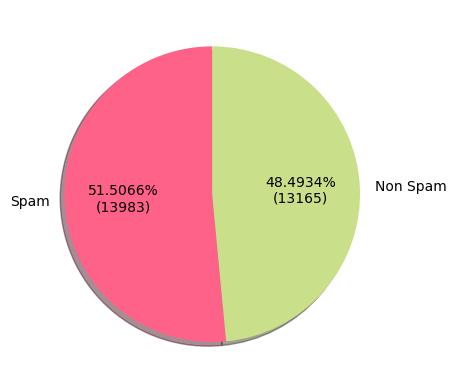

In [151]:
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)
colors = ( '#ff6289', '#c9df8a') 
fig = plt.figure()
plt.pie(visual, labels=['Spam','Non Spam'],startangle=90, colors = colors, autopct=my_fmt, shadow=True)

This data is well-balanced, it will make sure that the model is not overfitting

In [161]:
spam = data_wf.loc[data_wf['label'] == 1]
spam.head()

,subject,body_text,label
0,"[subject, buy, prescripiton, pill]","[boulder, rendition, wingback, equivocate, alb...",1
5,"[subject, improve, health, today, free]","[seen, nbc, cbs, cnn, even, oprah, health, dis...",1
7,"[subject, choose, online, shopping, quality, i...","[wide, selection, quality, ink, product, onlin...",1
10,"[subject, 4, 1, forward, stock, split, end, mo...","[look, info, received, hllf, halal, financial,...",1
12,"[subject, 959, 647, sound, ]","[hello, sent, email, recently, like, confirm, ...",1


In [162]:
non_spam = data_wf.loc[data_wf['label'] == 0]
non_spam.head()

,subject,body_text,label
1,"[subject, swift, october, 2000, vols]","[done, daren, j, farmer, 10, 16, 2000, 03, 46,...",0
2,"[subject, eastrans, nomination, change, effect...","[delivery, eastrans, continue, 30, 000, mmbtu,...",0
3,"[subject, weekend, oncall, note]","[friday, 1, 19, 01, received, call, sheila, ba...",0
4,"[subject, hello]","[hello, vince, week, week, pretty, relaxing, t...",0
6,"[subject, enron, announcement]","[car, rental, option, enron, traveler, rental,...",0


In [163]:
subjects_spam_flat = []
for sublist in spam['subject'].tolist():
    subjects_spam_flat.extend(sublist)
content_spam_flat = []
for sublist in spam['body_text'].tolist():
    content_spam_flat.extend(sublist)

In [164]:
subjects_non_spam_flat = []
for sublist in non_spam['subject'].tolist():
    subjects_non_spam_flat.extend(sublist)
content_no__spam_flat = []
for sublist in non_spam['body_text'].tolist():
    content_no__spam_flat.extend(sublist)

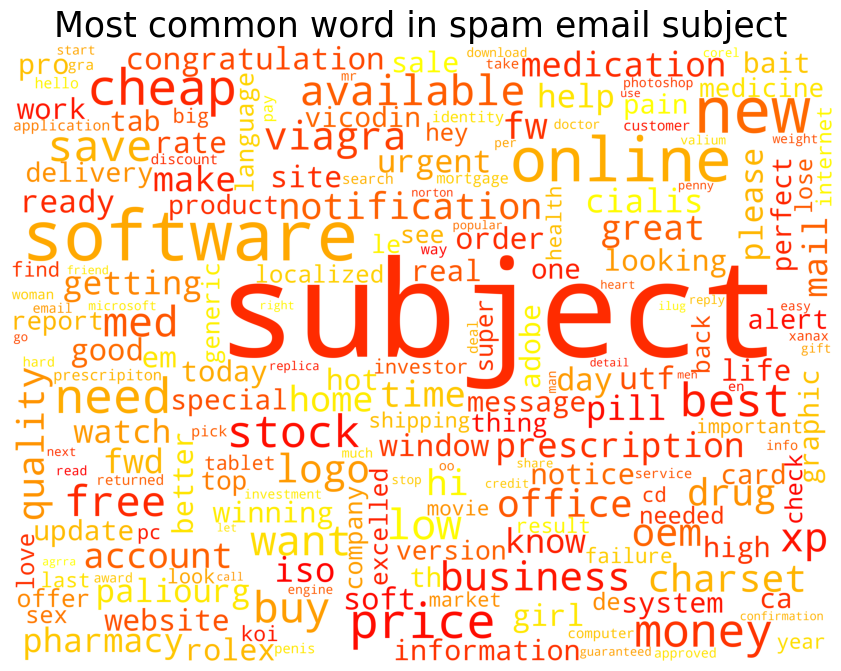

In [165]:
wordcloud = WordCloud(width=4000, height=3000, regexp=r"\w[\w' ]+", background_color="white",colormap="autumn_r",collocations=False,).generate("+".join(subjects_spam_flat))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.title("Most common word in spam email subject",fontdict={'size': 25})
plt.show()
plt.close()

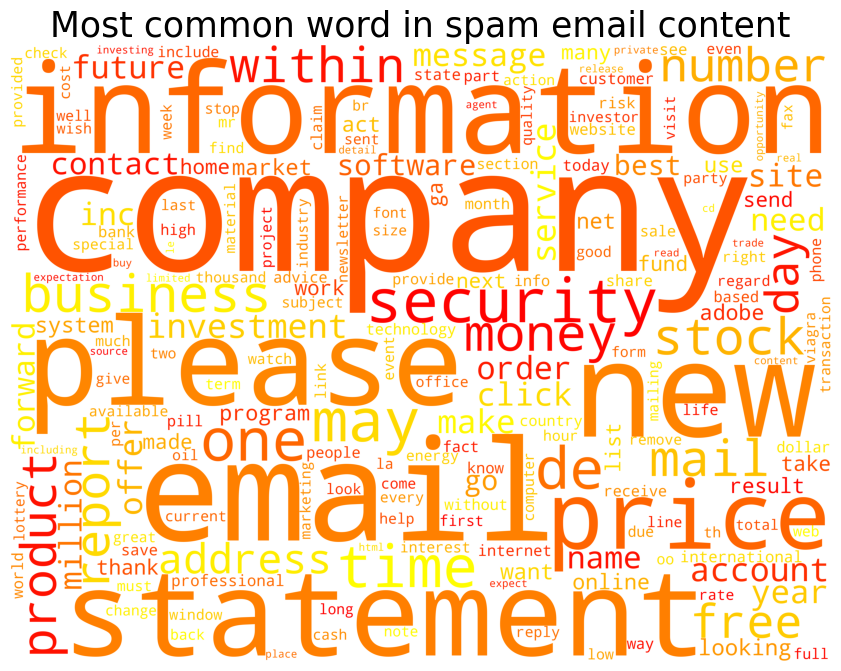

In [166]:
wordcloud = WordCloud(width=4000, height=3000, regexp=r"\w[\w' ]+", background_color="white",colormap="autumn_r",collocations=False,).generate("+".join(content_spam_flat))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.title("Most common word in spam email content",fontdict={'size': 25})
plt.show()
plt.close()

As we can see, most of the words in the spam category are related to money. 

A significant portion of email scams revolves around financial themes. Scammers often leverage people's interest in money, financial gain, or urgent financial matters to exploit them. This approach is driven by the fact that financial concerns tend to be a powerful motivator, and individuals may be more susceptible to manipulation when it comes to their financial well-being.

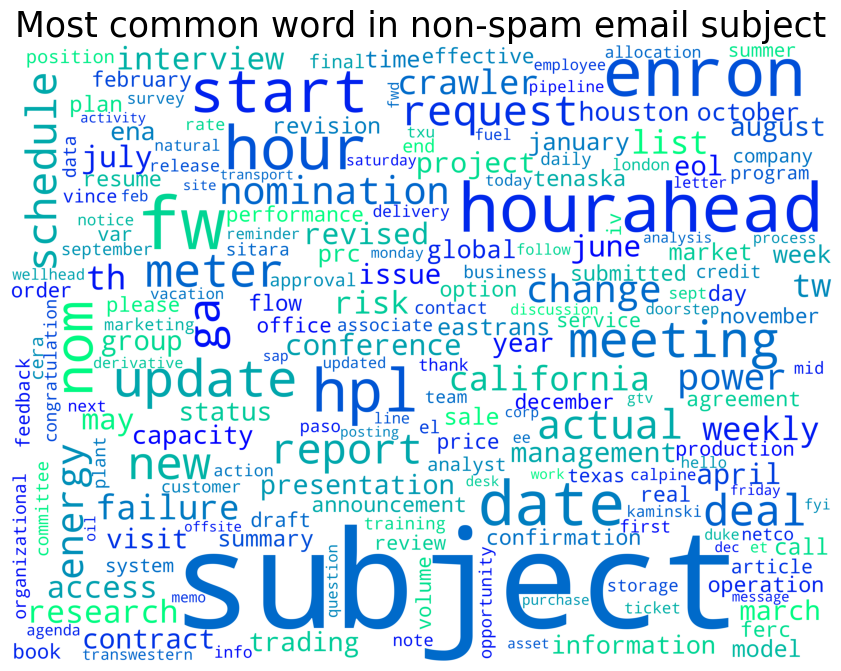

In [149]:
wordcloud = WordCloud(width=4000, height=3000, regexp=r"\w[\w' ]+", background_color="white",colormap="winter",collocations=False,).generate("+".join(subjects_non_spam_flat))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.title("Most common word in non-spam email subject",fontdict={'size': 25})
plt.show()
plt.close()

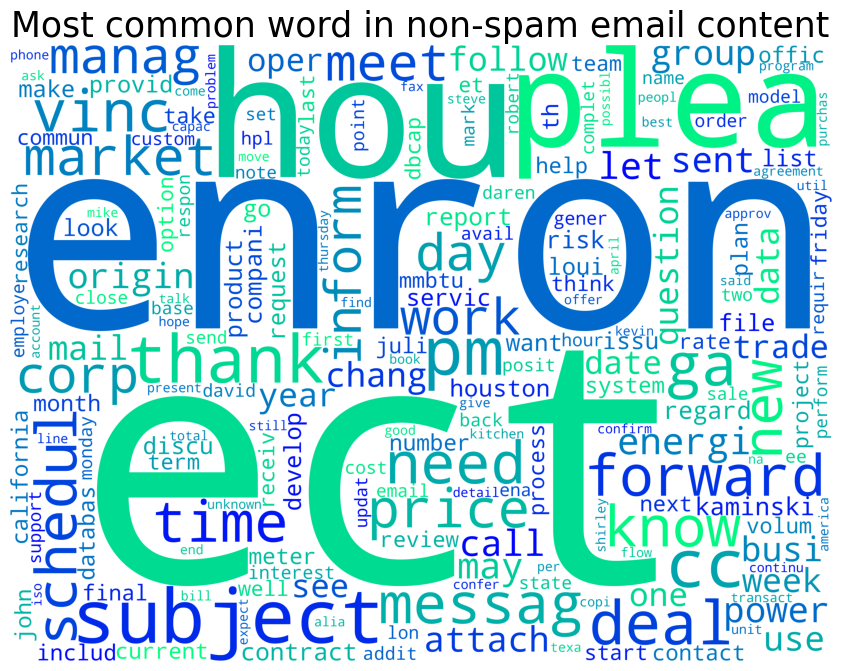

In [150]:
wordcloud = WordCloud(width=4000, height=3000, regexp=r"\w[\w' ]+", background_color="white",colormap="winter",collocations=False,).generate("+".join(content_no__spam_flat))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.title("Most common word in non-spam email content",fontdict={'size': 25})
plt.show()

Most of the words in the non-spam category are related to date-time. By looking at these word clouds, we can figure it out that a large portion of emails here are reply mails.